In [65]:
import pandas as pd

PATH_DATA = '../dataset/'

In [66]:
df = pd.read_csv(PATH_DATA+'fw_user.csv')
df.sample(5)

,web_framework,responden,salary,percentage,type
14,FastAPI,2447,54049.0,3.88,server
7,ASP.NET,9918,56220.0,15.74,server
10,Angular.js,7242,49450.0,11.49,client
11,Laravel,6377,29196.0,10.12,server
2,Express,15010,47850.0,23.82,client


In [67]:
df_r = df[['web_framework', 'responden', 'percentage']]
df_r.head(5)

,web_framework,responden,percentage
0,React.js,25296,40.14
1,jQuery,21693,34.42
2,Express,15010,23.82
3,Angular,14471,22.96
4,Vue.js,11954,18.97


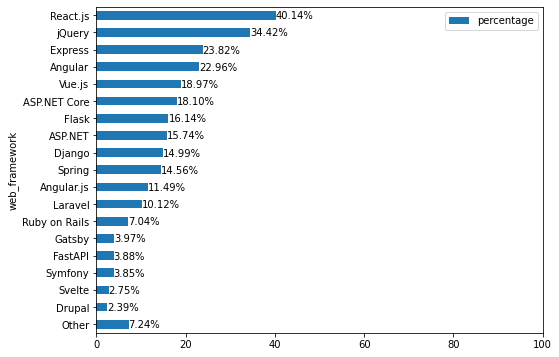

In [68]:
ax1 = df_r.plot(kind='barh', x='web_framework', y='percentage', xlim=(0,100), figsize = (8,6))

for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax1.annotate(f'{width/100:.2%}', (x + width, y + height*0.9))

ax1.invert_yaxis()
ax1.figure.savefig('../img/groupby-percentage.jpg')

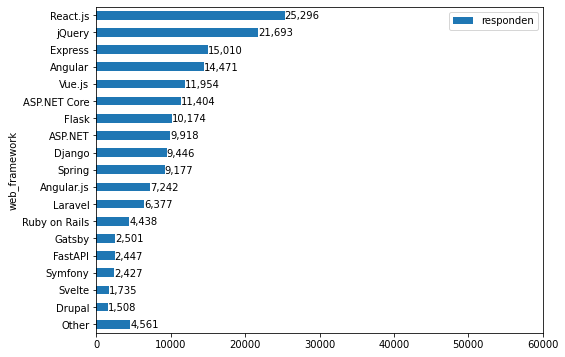

In [69]:
ax2 = df_r.plot(kind='barh', x='web_framework', y='responden', xlim=(0,60000), figsize = (8,6))

for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.annotate(f'{width:,}', (x + width, y + height*0.9))

ax2.invert_yaxis()
ax2.figure.savefig('../img/groupby-responden.jpg')

In [70]:
df_s = df[['web_framework', 'salary']]
df_s = df_s.sort_values('salary', ascending=False).reset_index(drop=True)
df_s.head(5)

,web_framework,salary
0,Ruby on Rails,77556.0
1,Svelte,62520.0
2,ASP.NET Core,60744.0
3,Gatsby,60129.0
4,React.js,58128.0


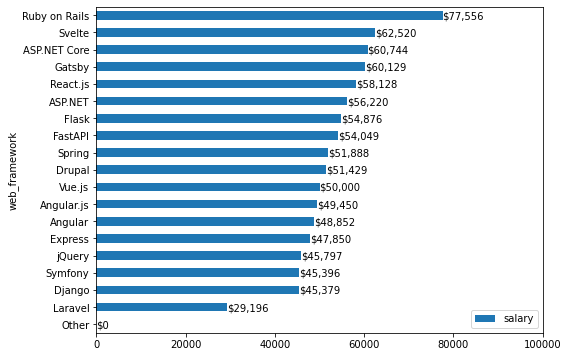

In [71]:
ax3 = df_s.plot(kind='barh', x='web_framework', xlim=(0,100000), figsize = (8,6))

for p in ax3.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax3.annotate('$'+f'{int(width):,}', (x + width, y + height*0.9))

ax3.invert_yaxis()
ax3.legend(loc=4)
ax3.figure.savefig('../img/groupby-salary.jpg')

In [72]:
mean_salary = df['salary'].mean()
mean_salary

52747.72222222222

In [73]:
df_t = df[['web_framework', 'salary', 'type']]
df_t.sample(5)

,web_framework,salary,type
14,FastAPI,54049.0,server
3,Angular,48852.0,client
8,Django,45379.0,server
0,React.js,58128.0,client
7,ASP.NET,56220.0,server


In [74]:
df_t = df_t.groupby('type').mean()
df_t

,salary
type,
client,52840.75
server,52673.30


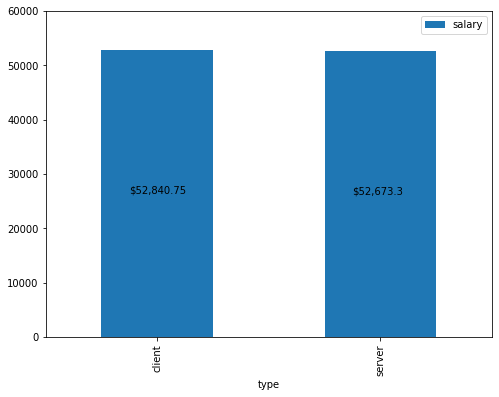

In [75]:
ax4 = df_t.plot(kind='bar', y='salary', ylim=(0, 60000), figsize=(8,6))

for p in ax4.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax4.annotate('$'+f'{height:,}', (x + width/4, y + height/2))

ax4.figure.savefig('../img/groupby-type.jpg')